In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [545]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA

In [546]:
from sklearn import svm
from sklearn import linear_model
from sklearn import ensemble
import xgboost as xgb
from sklearn import naive_bayes

In [547]:
data = pd.read_csv('mtcars.csv')

In [548]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [549]:
data.count()

Unnamed: 0    32
mpg           32
cyl           32
disp          32
hp            32
drat          32
wt            32
qsec          32
vs            32
am            32
gear          32
carb          32
dtype: int64

In [550]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [551]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [552]:
data.isna().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

In [553]:
data.drop(columns=['Unnamed: 0'], inplace = True)

In [554]:
x=data.drop(columns=['am'])
y=data['am']

In [555]:
np.bincount(y)

array([19, 13])

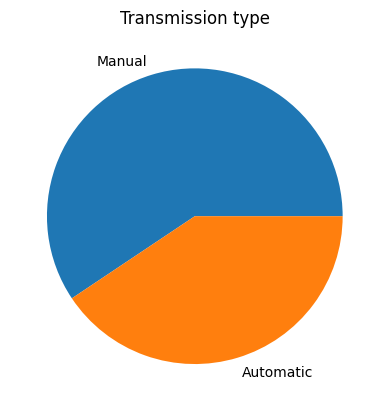

In [556]:

plt.pie(np.bincount(y), labels=['Manual', 'Automatic'])
plt.title('Transmission type')
plt.show()

In [557]:
x.shape

(32, 10)

In [558]:
y.shape

(32,)

In [559]:
feature_names = x.columns

In [560]:
x.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,3,2


In [561]:
feature_names

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'gear', 'carb'], dtype='object')

In [562]:
descriptive_feature_names = 	{'mpg':	'Miles/(US) gallon',
'cyl'	:'Number of cylinders',
'disp':	'Displacement (cu.in.)',
'hp':	'Gross horsepower',
'drat':	'Rear axle ratio',
'wt':	'Weight (1000 lbs)',
'qsec':	'1/4 mile time',
'vs':	'Engine (0 = V-shaped, 1 = straight)',
'am':	'Transmission (0 = automatic, 1 = manual)',
'gear':	'Number of forward gears',
'carb':	'Number of carburetors'
  }

In [563]:
number_of_features = len(feature_names)

In [564]:
number_of_features

10

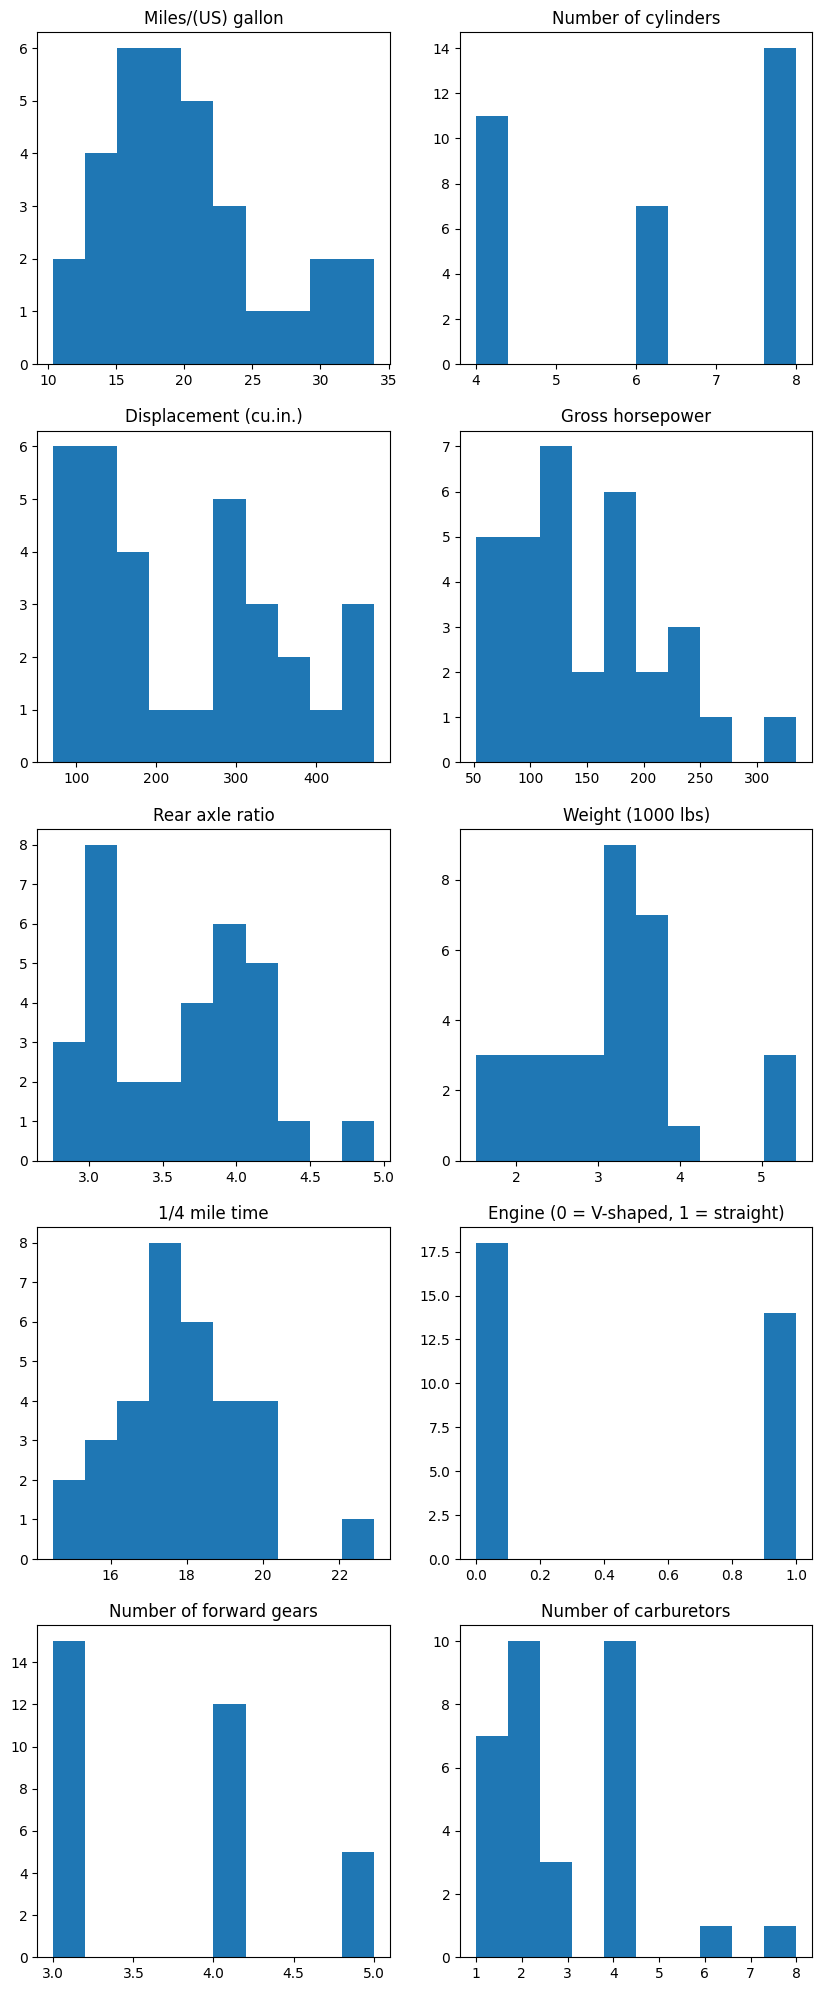

In [565]:
fig = plt.figure(figsize = (10,25))
fig.tight_layout(pad=5.0)
for i, feature in zip(range(number_of_features), feature_names):
    feature_type = np.dtype(x[feature].dtype)
    plt.subplot(5,2,i+1)
    plt.title(descriptive_feature_names[feature])

    plt.hist(x[feature])

    i+=1
plt.show()

In [566]:
corrcoefs = []
for feature_name in feature_names:
    corrcoef = np.corrcoef(x[feature_name].values, y.values.ravel())[0, 1]
    corrcoefs.append(corrcoef)
    print(feature_name, corrcoef)

mpg 0.599832429454648
cyl -0.5226070469006754
disp -0.5912270400639476
hp -0.24320425718585106
drat 0.7127111272262697
wt -0.6924952588394844
qsec -0.22986086218488297
vs 0.16834512458535864
gear 0.7940587602563435
carb 0.057534351070504114


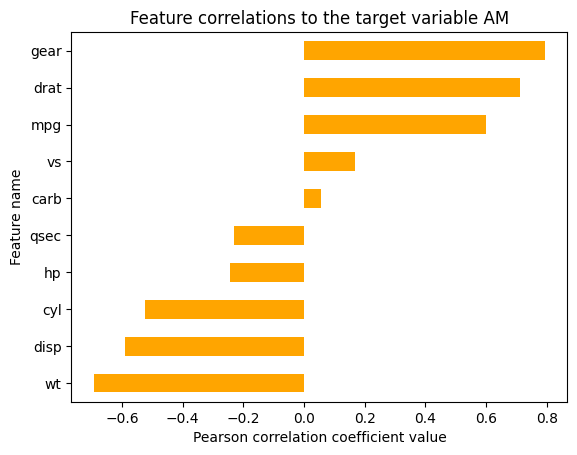

In [567]:
corrcoefs_for_plot = pd.Series(corrcoefs, index=feature_names)
corrcoefs_for_plot.sort_values(inplace=True)

corrcoefs_for_plot.plot(kind='barh', color='orange')
plt.title('Feature correlations to the target variable AM')
plt.xlabel('Pearson correlation coefficient value')
plt.ylabel('Feature name')
plt.show()

In [568]:
correlated_feature_names = feature_names[np.abs(corrcoefs) > 0.5]

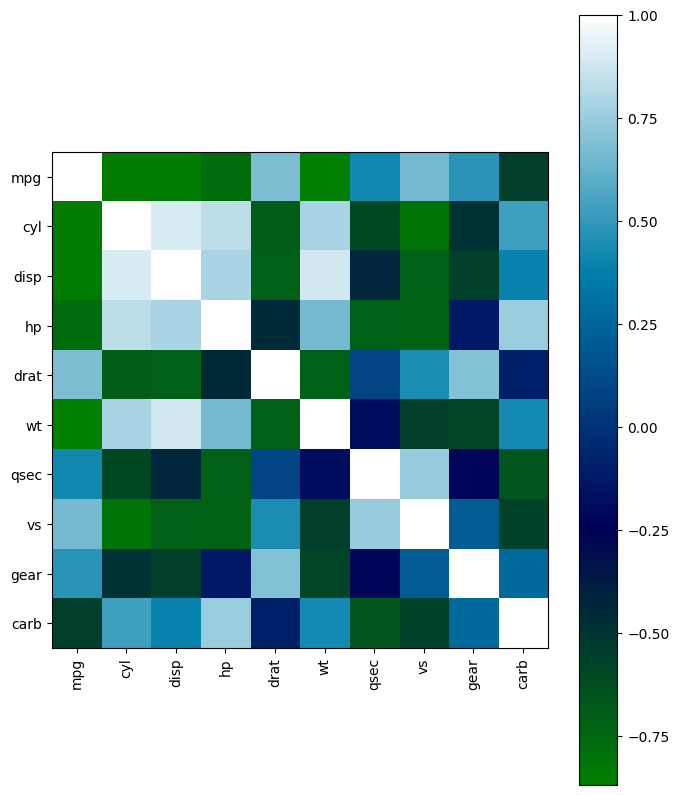

In [569]:
correlation_matrix = x.corr()

plt.figure(figsize=(8, 10))
plt.xticks(range(number_of_features), feature_names, rotation='vertical')
plt.yticks(range(number_of_features), feature_names)
plt.imshow(correlation_matrix, cmap='ocean')
plt.colorbar()
plt.show()

In [570]:
def correlation_strength(value, threshold=0.8):
    if np.abs(value) < threshold:
        return 0
    else:
        return np.abs(value)

In [571]:
correlation_matrix_highly_corr = correlation_matrix.applymap(correlation_strength)

In [572]:
correlation_matrix_highly_corr.style.background_gradient(cmap='gray').format(precision = 2)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
mpg,1.00,0.85,0.85,0.00,0.00,0.87,0.00,0.00,0.00,0.00
cyl,0.85,1.00,0.90,0.83,0.00,0.00,0.00,0.81,0.00,0.00
disp,0.85,0.90,1.00,0.00,0.00,0.89,0.00,0.00,0.00,0.00
hp,0.00,0.83,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
drat,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
wt,0.87,0.00,0.89,0.00,0.00,1.00,0.00,0.00,0.00,0.00
qsec,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
vs,0.00,0.81,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
gear,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
carb,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [573]:
correlated_feature_names

Index(['mpg', 'cyl', 'disp', 'drat', 'wt', 'gear'], dtype='object')

In [574]:
x = x[correlated_feature_names]

In [575]:
x.drop(columns = ['mpg', 'disp'], inplace = True)

<ipython-input-575-895b886a9b3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns = ['mpg', 'disp'], inplace = True)


In [576]:
number_of_features = len(x.columns)

In [577]:
x.columns

Index(['cyl', 'drat', 'wt', 'gear'], dtype='object')

In [578]:
scaler = preprocessing.StandardScaler()

In [579]:
scaler.fit(x)


StandardScaler()

In [580]:
x_scaled = scaler.transform(x)

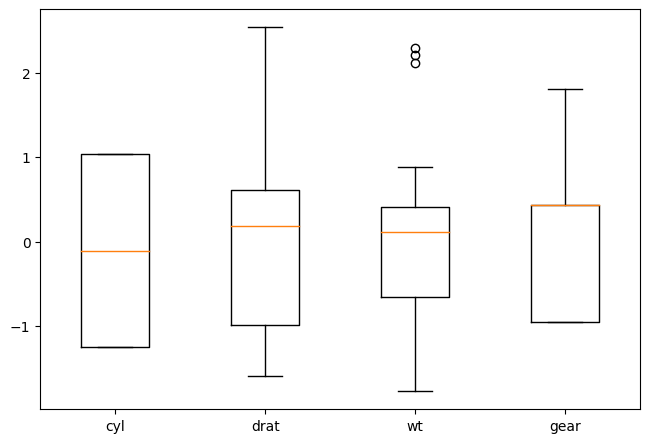

In [581]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(x_scaled)
plt.xticks(np.arange(1,number_of_features+1),x.columns)
plt.show()

In [582]:
feature_names = x.columns

In [583]:

x.head()


,cyl,drat,wt,gear
0,6,3.90,2.620,4
1,6,3.90,2.875,4
2,4,3.85,2.320,4
3,6,3.08,3.215,3
4,8,3.15,3.440,3


# Model selection and evaluation


In [584]:
results={}

In [585]:
def evaluate_model(base_model, k_folds = 3, params={}):
    cv = model_selection.KFold(n_splits=k_folds, shuffle=True)
    scores=[]
    best={}
    best['best_score']=-10000
    for train_ind, test_ind in cv.split(x,y):
        x_train=x.iloc[train_ind,:]
        y_train = y[train_ind]
        x_test = x.iloc[test_ind, :]
        y_test = y[test_ind]
        scaler = preprocessing.StandardScaler()
        scaler.fit(x_train)
        x_train  = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        if len(params) > 0:
            model = model_selection.GridSearchCV(base_model,params, cv=5)
        else:
            model = base_model
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        score = metrics.f1_score(y_test,y_pred)
        print(score)
        print('Classification report ')
        print(metrics.classification_report(y_test, y_pred))
        print('Confusion matrix ')
        print(metrics.confusion_matrix(y_test,y_pred))
        if(score > best['best_score']):
            best['best_score'] = score
            if len(params) >0:
                best['params'] = model.best_params_
        scores.append(score)
    best['scores']=scores
    best['average_score'] = np.average(scores)
    return best

### SVM model

In [586]:
params = {'gamma':[10**i for i in range(-3,1)],'C':[10**i for i in range(1,4)],'kernel' :['linear','rbf']}
model = svm.SVC()

results['SVM'] = evaluate_model(model,params= params)

0.9090909090909091
Classification report 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Confusion matrix 
[[5 0]
 [1 5]]
0.9090909090909091
Classification report 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Confusion matrix 
[[5 0]
 [1 5]]
0.5
Classification report 
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.33      1.00      0.50         1

    a

In [587]:
results['SVM']

{'best_score': 0.9090909090909091,
 'params': {'C': 10, 'gamma': 0.001, 'kernel': 'linear'},
 'scores': [0.9090909090909091, 0.9090909090909091, 0.5],
 'average_score': 0.7727272727272728}

### Logistic regression

In [588]:
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
results['Logistic regression'] = evaluate_model(model)

1.0
Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Confusion matrix 
[[7 0]
 [0 4]]
0.7499999999999999
Classification report 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.60      1.00      0.75         3

    accuracy                           0.82        11
   macro avg       0.80      0.88      0.80        11
weighted avg       0.89      0.82      0.83        11

Confusion matrix 
[[6 2]
 [0 3]]
1.0
Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy        

In [589]:
results['Logistic regression']

{'best_score': 1.0,
 'scores': [1.0, 0.7499999999999999, 1.0],
 'average_score': 0.9166666666666666}

### Linear SVM

In [590]:
model = svm.LinearSVC()
results['Linear SVM'] = evaluate_model(model)

1.0
Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Confusion matrix 
[[5 0]
 [0 6]]
0.7692307692307693
Classification report 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.62      1.00      0.77         5

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11

Confusion matrix 
[[3 3]
 [0 5]]
0.6666666666666666
Classification report 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.50      0.67         2

    a

In [591]:
results['Linear SVM']

{'best_score': 1.0,
 'scores': [1.0, 0.7692307692307693, 0.6666666666666666],
 'average_score': 0.8119658119658119}

### Bayesian Ridge

In [592]:
model = naive_bayes.GaussianNB()
results['Gaussian NB'] = evaluate_model(model)

0.8571428571428571
Classification report 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.75      1.00      0.86         3

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11

Confusion matrix 
[[7 1]
 [0 3]]
0.9411764705882353
Classification report 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.89      1.00      0.94         8

    accuracy                           0.91        11
   macro avg       0.94      0.83      0.87        11
weighted avg       0.92      0.91      0.90        11

Confusion matrix 
[[2 1]
 [0 8]]
0.5714285714285715
Classification report 
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.40      1.00      0.57  

In [593]:
results['Gaussian NB']

{'best_score': 0.9411764705882353,
 'scores': [0.8571428571428571, 0.9411764705882353, 0.5714285714285715],
 'average_score': 0.7899159663865546}

### Random Forest

In [594]:
params = {'n_estimators' : [10*i for i in range(1,5)],  'max_depth' : [2,3,4]}
model = ensemble.RandomForestClassifier()

results['Random Forest'] = evaluate_model(model,params =params)

0.8571428571428571
Classification report 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.75      1.00      0.86         3

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11

Confusion matrix 
[[7 1]
 [0 3]]
0.6666666666666666
Classification report 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.67      0.67      0.67         3

    accuracy                           0.82        11
   macro avg       0.77      0.77      0.77        11
weighted avg       0.82      0.82      0.82        11

Confusion matrix 
[[7 1]
 [1 2]]
0.923076923076923
Classification report 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92   

In [595]:
results['Random Forest']

{'best_score': 0.923076923076923,
 'params': {'max_depth': 3, 'n_estimators': 10},
 'scores': [0.8571428571428571, 0.6666666666666666, 0.923076923076923],
 'average_score': 0.8156288156288155}

### XGBoost

In [596]:
params = {'n_estimators' : [10*i for i in range(1,5)], 'max_depth' : [2,3,4]}
model = xgb.XGBClassifier()

results['XGBoost'] = evaluate_model(model,params= params)

0.5714285714285715
Classification report 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.40      1.00      0.57         2

    accuracy                           0.73        11
   macro avg       0.70      0.83      0.69        11
weighted avg       0.89      0.73      0.76        11

Confusion matrix 
[[6 3]
 [0 2]]
0.8333333333333333
Classification report 
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.71      0.83         7

    accuracy                           0.82        11
   macro avg       0.83      0.86      0.82        11
weighted avg       0.88      0.82      0.82        11

Confusion matrix 
[[4 0]
 [2 5]]
1.0
Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    a

In [597]:
results['XGBoost']

{'best_score': 1.0,
 'params': {'max_depth': 2, 'n_estimators': 10},
 'scores': [0.5714285714285715, 0.8333333333333333, 1.0],
 'average_score': 0.8015873015873015}

# Final models

In [598]:
final_model = {}

In [609]:
final_model['Logistic Regression']  = linear_model.LogisticRegression(penalty='l2', C=1.0)
final_model['Logistic Regression'].fit(x,y)

LogisticRegression()

In [615]:
final_model['Logistic Regression'].intercept_

array([-4.66197341])

In [600]:
final_model['Linear SVM']  = svm.LinearSVC()
final_model['Linear SVM'].fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [601]:
params = results['SVM']['params']
gamma = params['gamma']
C = params['C']
final_model['SVM'] = svm.SVC(C=C,gamma=gamma)
final_model['SVM'].fit(x,y)

SVC(C=10, gamma=0.001)

In [602]:
final_model['Gaussian Nb']  = naive_bayes.GaussianNB()
final_model['Gaussian Nb'].fit(x,y)


GaussianNB()

In [603]:

params = results['Random Forest']['params']
n_estimators = params['n_estimators']
max_depth = params['max_depth']
final_model['Random Forest']  =ensemble.RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth)
final_model['Random Forest'].fit(x,y)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [604]:
params = results['XGBoost']['params']
n_estimators = params['n_estimators']
max_depth = params['max_depth']
final_model['XGBoost']  = xgb.XGBClassifier(n_estimators = n_estimators, max_depth = max_depth)
final_model['XGBoost'].fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [605]:
import csv
with open('results_classification.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in results.items():
       writer.writerow([key, value])
from google.colab import files
files.download("results_classification.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>